In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy import units as u
from matplotlib.ticker import LogLocator, ScalarFormatter

from plato.instrument import DetectionModel
from plato.visualisation import (
    FigureProcessor,
    get_palette,
    set_plot_defaults,
)

In [2]:
set_plot_defaults()

figure_directory = f"../figures/05_detection_efficiency/"
save = True

## PLOT EXAMPLE DETECTION EFFICIENCY

In [14]:
# calculate detection efficies on a grid of r_planet and porb
n = 1000

r_planet = np.linspace(0.3, 1.2, n) * u.Rearth
porb = np.geomspace(1, 2 * 365, n) * u.day

r_planet, porb = np.meshgrid(r_planet, porb)

data = pd.DataFrame(
    list(zip(r_planet.ravel().value, porb.ravel().value)),  # type: ignore
    columns=["R_planet", "P_orb"],
)

data["R_star"] = 1
data["M_star"] = 1
data["Magnitude_V"] = 11
data["n_cameras"] = 24
data["cos_i"] = 0
data["sigma_star"] = 1e-6
data["u1"] = 0.4
data["u2"] = 0.5

data["Detection Efficiency"] = DetectionModel().detection_efficiency(data)
detection_efficiency = data["Detection Efficiency"].values.reshape(n, n)  # type: ignore

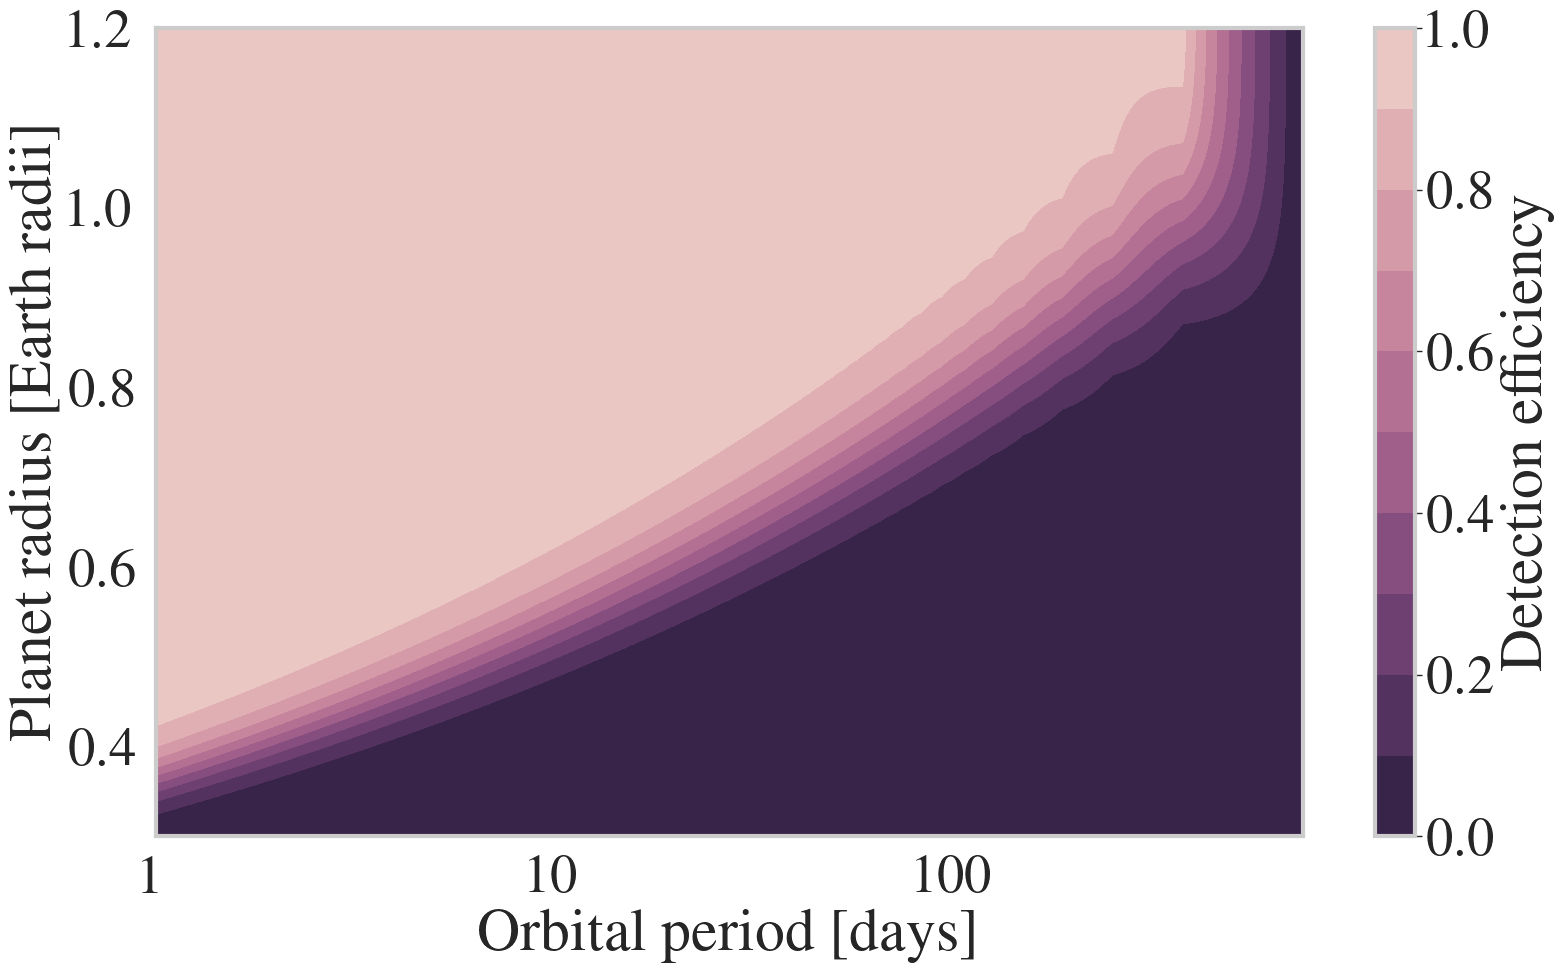

In [37]:
fig, ax = plt.subplots()

contour = ax.contourf(
    porb,
    r_planet,
    detection_efficiency,
    levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    cmap=get_palette(n_colors=10, as_cmap=True, reverse=True),  # Set the color map
)

ax.set_xscale("log")

ax.tick_params(axis="both", which="major", length=10, width=3)
ax.tick_params(axis="both", which="minor", length=6, width=2)

ax.xaxis.set_major_locator(LogLocator())
ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_xlabel("Orbital period [days]")
ax.set_ylabel("Planet radius [Earth radii]")

# Add colorbar
cbar = fig.colorbar(contour)
cbar.set_label("Detection efficiency")

FigureProcessor(fig).save(
    "detection_efficiency_contour.pdf",
    figure_directory=figure_directory,
    save=save,
)

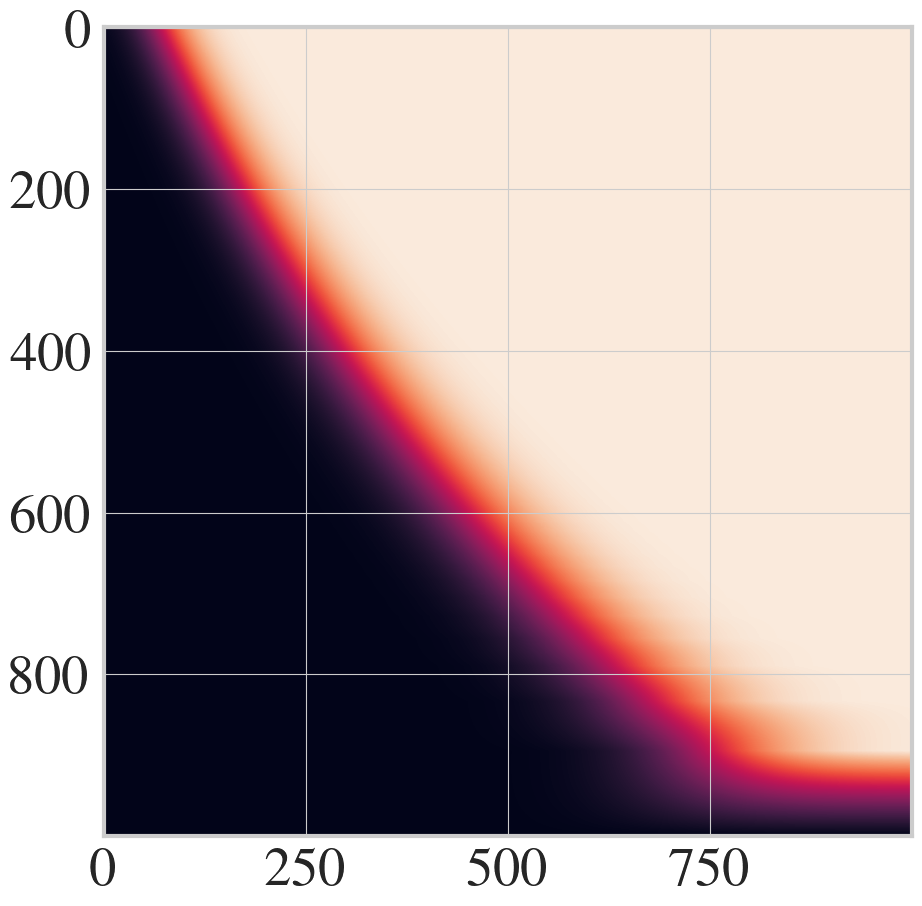

In [27]:
plt.imshow(detection_efficiency, interpolation="bilinear")